In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [31]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
all_data = data_train.iloc[:,2:12].append(data_test.iloc[:,1:11], ignore_index=True)

In [32]:
data_train.info()
print '------------------------'
data_test.info()
print '-------------------------'
data_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
# 删除id列
data_train = data_train.drop(['PassengerId'], axis=1)

In [34]:
data_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 各属性分布描述

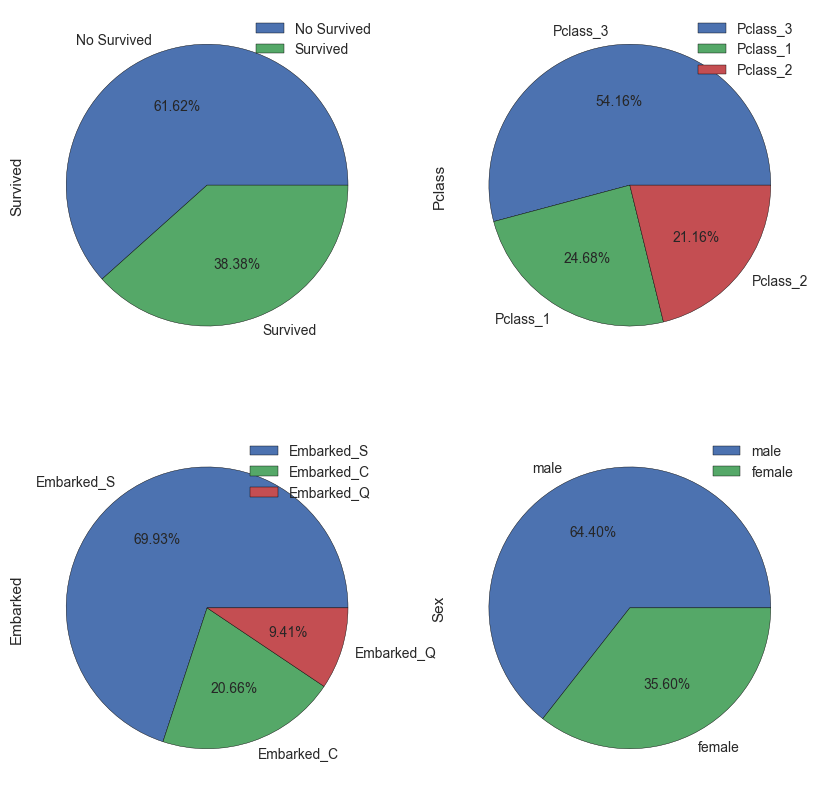

In [35]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
# 幸存比例
data_train['Survived'].value_counts().plot(kind='pie', labels=['No Survived','Survived'],ax=axes[0,0], legend=True,autopct='%.2f%%')
axes[0,0].set_aspect('equal')
# Pclass比例
all_data['Pclass'].value_counts().plot(kind='pie', labels=['Pclass_3','Pclass_1','Pclass_2'],ax=axes[0,1], legend=True, autopct='%.2f%%')
axes[0,1].set_aspect('equal')
# 登船口比例
all_data['Embarked'].value_counts().plot(kind='pie', labels=['Embarked_S','Embarked_C','Embarked_Q'], ax=axes[1,0],legend=True, autopct='%.2f%%')
axes[1,0].set_aspect('equal')
# sex 比例
all_data['Sex'].value_counts().plot(kind='pie', labels=['male','female'], ax=axes[1,1], legend=True, autopct='%.2f%%')
axes[1,1].set_aspect('equal')

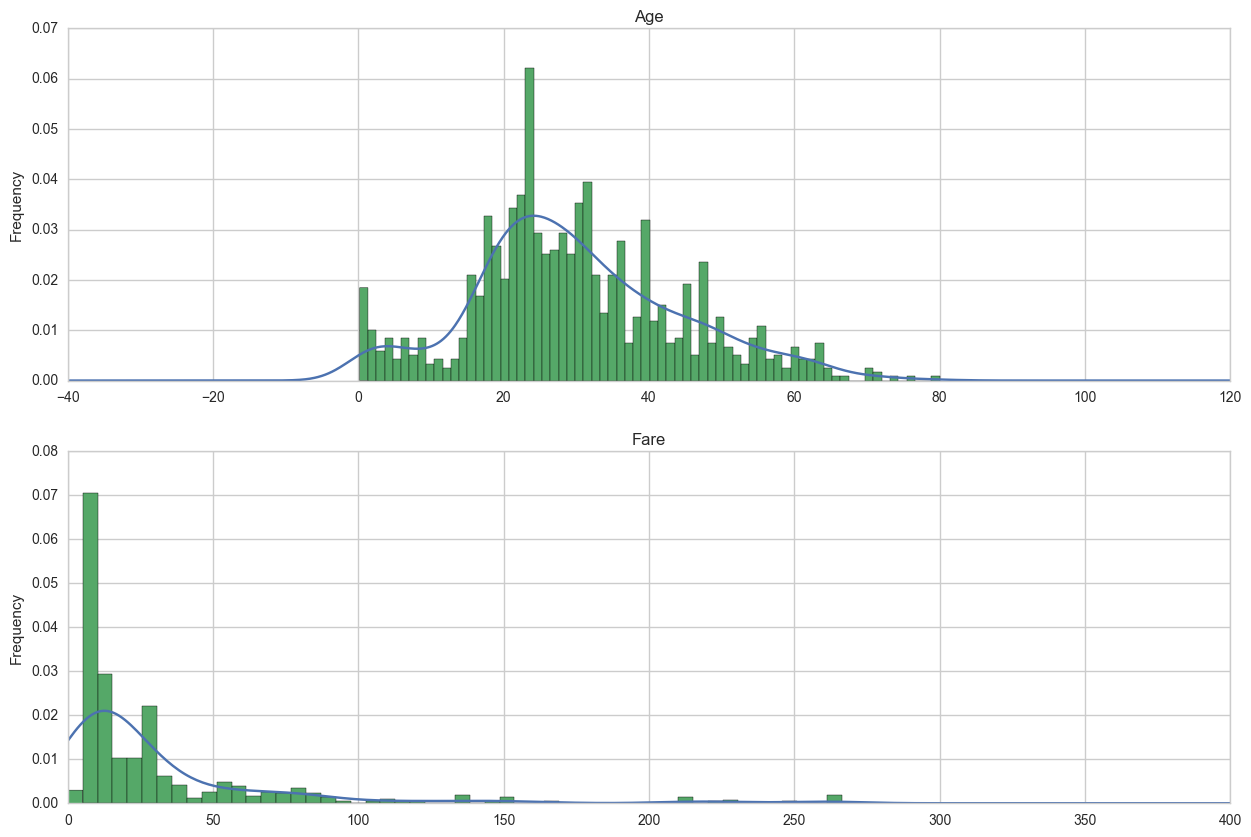

In [36]:
# Age
fig,axes = plt.subplots(2,1, figsize=(15,10))
all_data.Age.dropna().plot(kind='kde',ax=axes[0],title='Age')
all_data.Age.dropna().plot(kind='hist',bins=70, normed=True, ax=axes[0])

# Fare
all_data.Fare.dropna().plot(kind='kde',ax=axes[1],title='Fare')
all_data.Fare.dropna().plot(kind='hist',bins=100, normed=True, ax=axes[1],xlim=[0,400])

## 属性与获救结果的关联统计
上面步骤对每个属性的分布作了可视化，接下来，根据人工经验，观察以下猜想是否成立：
1. 阶级等级越高，那么其社会地位财富也就越多，那么最后的获救概率是否也越大？
2. 从电影中我们知道，逃生时，小孩和女性优先，那么年龄结构是否与获救概率相关？
3. 船票价格越贵的乘客，逃生几率是否也越大？

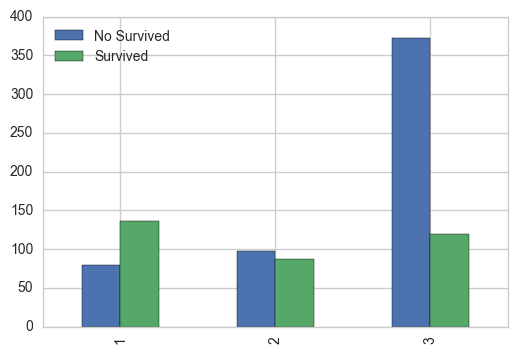

In [37]:
Survived_Pclass_0 = data_train.Pclass[data_train.Survived==0].dropna().value_counts()
Survived_Pclass_1 = data_train.Pclass[data_train.Survived==1].dropna().value_counts()

df = pd.DataFrame({'Survived': Survived_Pclass_1, 'No Survived': Survived_Pclass_0})
df.plot(kind='bar')

从上图可以看到，社会地位越高，那么其获救的可能性也就越大。因此，Pclass是一个重要的特征。

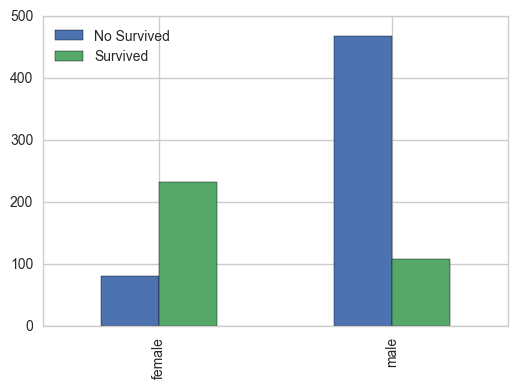

In [38]:
Survived_Sex_0 = data_train.Sex[data_train.Survived == 0].dropna().value_counts()
Survived_Sex_1 = data_train.Sex[data_train.Survived == 1].dropna().value_counts()

df = pd.DataFrame({'Survived': Survived_Sex_1, 'No Survived': Survived_Sex_0})
df.plot(kind='bar')

显然，女性获救的可能性远高于男性。因此，Sex也是一个重要的特征。

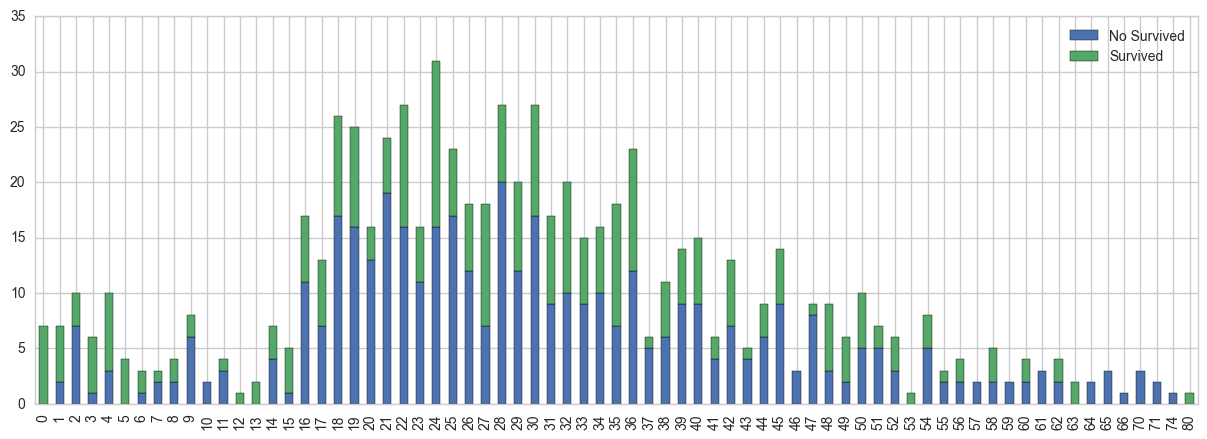

In [39]:
Survived_Age_0 = data_train.Age[data_train.Survived==0].dropna().astype(int).value_counts()
Survived_Age_1 = data_train.Age[data_train.Survived==1].dropna().astype(int).value_counts()

df = pd.DataFrame({'Survived': Survived_Age_1, 'No Survived': Survived_Age_0})
df.plot(kind='bar', stacked=True, figsize=(15,5))

按照我们的猜测来说，小孩获救几率应该很高，但是上图好像并不能体现这一特征，先放一边。

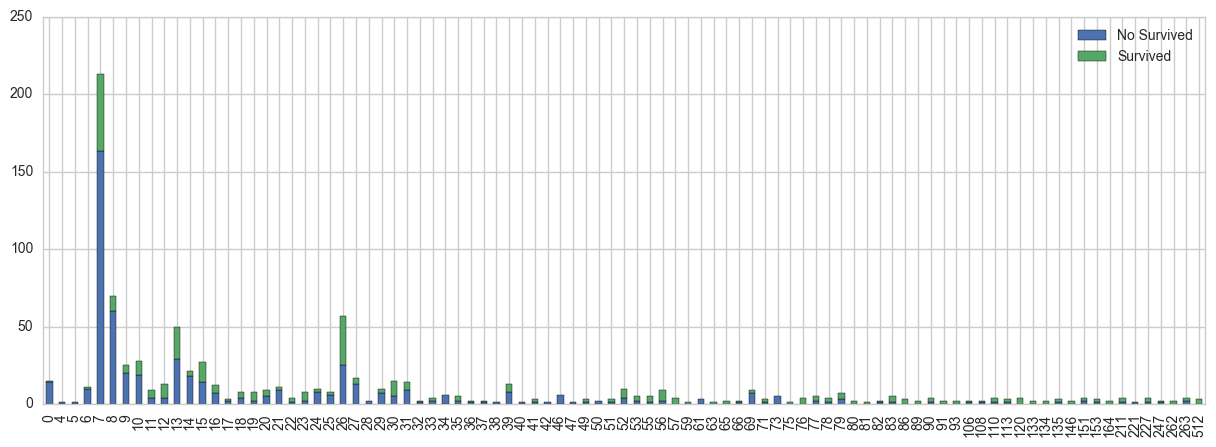

In [40]:
Survived_Fare_0 = data_train.Fare[data_train.Survived==0].dropna().astype(int).value_counts()
Survived_Fare_1 = data_train.Fare[data_train.Survived==1].dropna().astype(int).value_counts()

df = pd.DataFrame({'Survived': Survived_Fare_1, 'No Survived': Survived_Fare_0})
df.plot(kind='bar', stacked=True, figsize=(15,5))

好像也看不出什么特别的规律，先放一边。
## 缺失值填充

In [41]:
all_data[all_data.Embarked.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


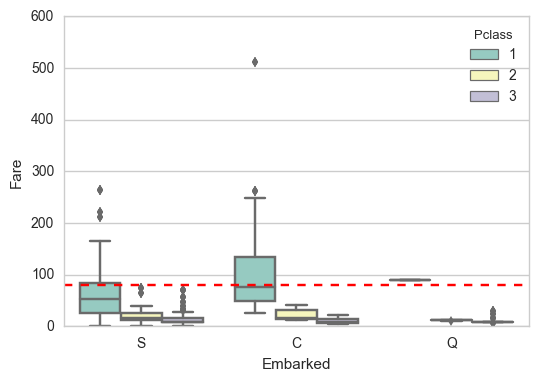

In [42]:
sns.boxplot(x='Embarked',y='Fare', hue='Pclass', data=all_data,palette="Set3" )
plt.axhline(80, color='r', linestyle='dashed')

In [43]:
data_train.loc[data_train.Embarked.isnull(),'Embarked'] = 'C'
all_data.loc[all_data.Embarked.isnull(),'Embarked'] = 'C'

In [44]:
#data_test.loc[data_test.Fare.isnull(),'Fare'] = all_data.Fare[all_data.Embarked == 'S'][all_data.Pclass == 3].median()
all_data.loc[all_data.Fare.isnull(),'Fare'] = all_data.Fare[all_data.Embarked == 'S'][all_data.Pclass == 3].median()

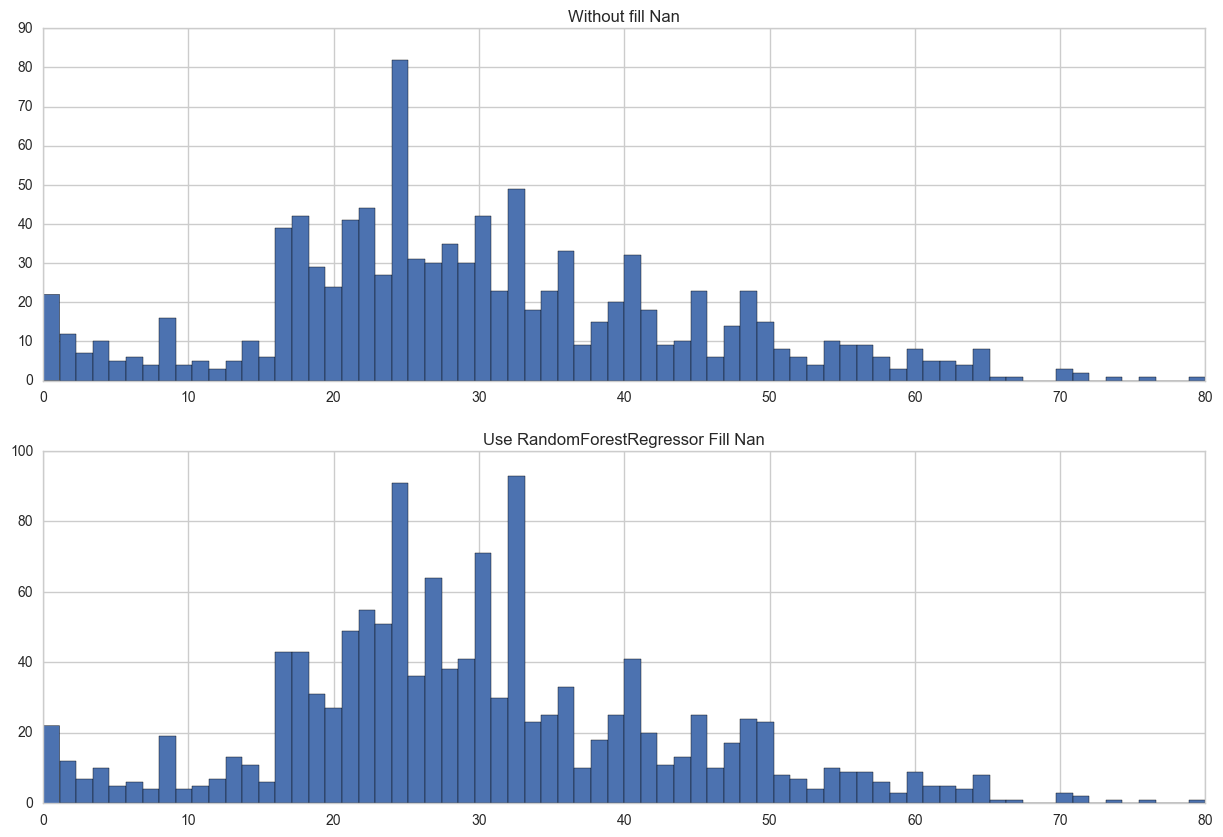

In [45]:
fig,axes = plt.subplots(2,1, figsize=(15,10))
all_data.Age.dropna().astype(int).hist(bins=70, ax= axes[0])
axes[0].set_title('Without fill Nan')

# 用随机森林预测年龄
from sklearn.ensemble import RandomForestRegressor

age_df = all_data[['Age','Fare','Parch','SibSp','Pclass']]
# 切分数据集
known_age = age_df[age_df.Age.notnull()].as_matrix()
unknown_age = age_df[age_df.Age.isnull()].as_matrix()
# label
y = known_age[:, 0]
# train data
X = known_age[:, 1:]
# training
rft = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
rft.fit(X,y)

predictAges = rft.predict(unknown_age[:, 1:])
all_data.loc[all_data.Age.isnull(),'Age'] = predictAges

all_data.Age.dropna().astype(int).hist(bins=70, ax=axes[1])
axes[1].set_title('Use RandomForestRegressor Fill Nan')

感觉使用随机森林回归填充的Age得到的分布和原来分布有点差别，先放一下吧，到时候继续修改。

In [46]:
data_train.loc[data_train.Age.isnull(),'Age'] = all_data.Age
data_test.Age = all_data.Age

In [47]:
dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix='Embarked')
dummies_Sex = pd.get_dummies(data_train['Sex'], prefix='Sex')
dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix='Pclass')

data_train = pd.concat([data_train, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
data_train.drop(['Pclass','Sex','Ticket','Embarked','Cabin','Name'],axis=1, inplace=True)

In [50]:
data_train

,Survived,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,0,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5,0,23.808938,0,0,8.4583,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
6,0,54.000000,0,0,51.8625,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
7,0,2.000000,3,1,21.0750,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8,1,27.000000,0,2,11.1333,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
9,1,14.000000,1,0,30.0708,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
